# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
pd.set_option('display.max_columns', 100)#покажем все столбцы так каких их уже больше 20 
pd.set_option('display.max_rows', 100)
data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

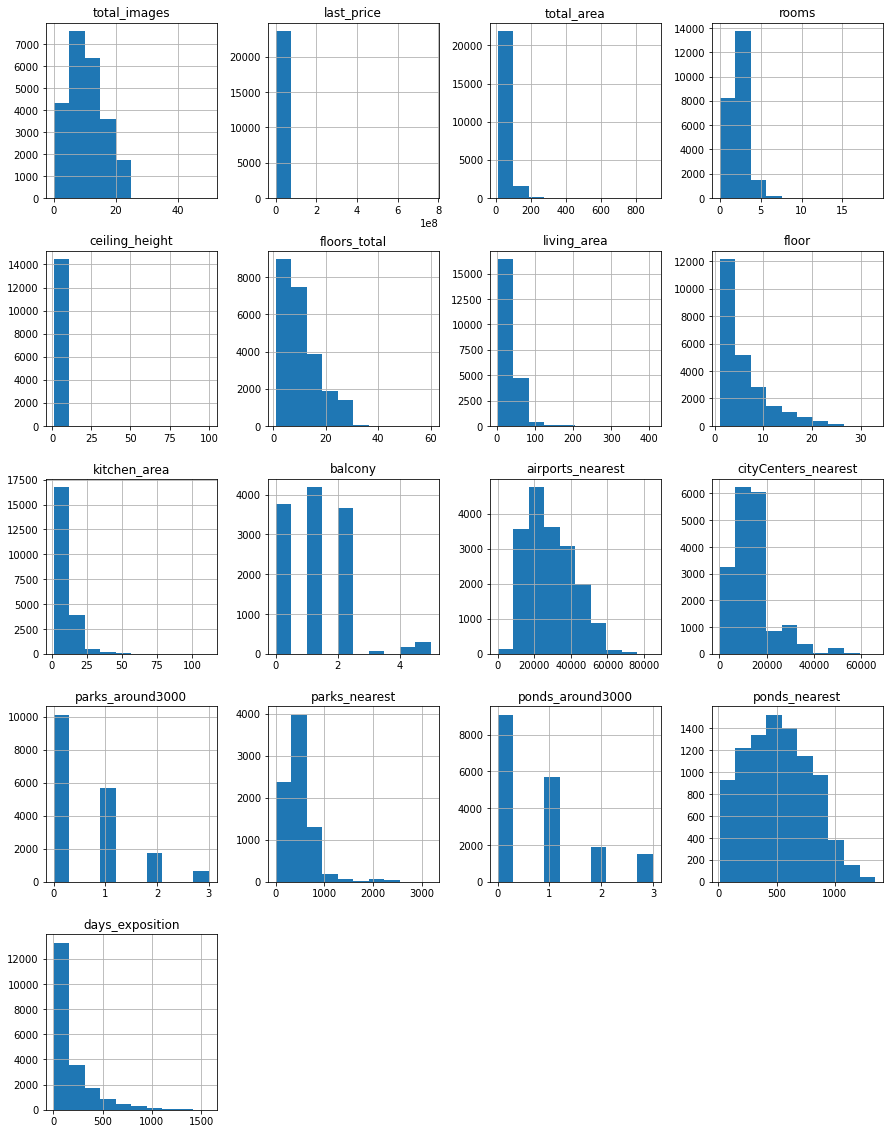

In [4]:
data.hist(figsize=(15, 20))

In [5]:
#Кол-во дубликатов
display(data.duplicated().sum())

0

В ходе ознакомлением с файлом мы вяснили:
В нем содержатся данные о 23699 объявлениях, явных дубликатов в которых нет,в большинстве столбцов тип данных, кроме столбцов с информацией о является ли квартира аппортаментами и даты с публикацией.  
Большое кол-во пропусков в столбцах с данными: 
- Является ли апартаментами;
- Расстояние до ближайшего парка;
- Расстояние до ближайшего водоёма;
- Число балконов;
- Высота потолков ;
- Расстояние до центра города;
- Число водоёмов в радиусе 3 км;
- Число парков в радиусе 3 км;
- Сколько дней было размещено объявление;
- Площадь кухни;
- Жилая площадь.
В стобцах с кол-вом этажей и с названием населённого пункта пропусков немного. В оставшихся столбцах пропусков нет.
В столбце с высотой полотолка есть нералистичные значения. 
Из за аномально больших значений маштаб некоторых графиков не позволяет расмотреть расспределения, для остальных они вид схожий с нормальным распределением или с распределением Пуассона
Рассмотри каждый проблемный столбец более подробно. 

### Предобработка данных

#### Пропуски в данных и неверные типы данных.

In [6]:
#посчитаем долю пропусков для столбцов
Nan_tab=data.isna().sum()
Nan_tab = pd.DataFrame(Nan_tab)
Nan_tab.columns=['Nan_count']
Nan_tab['share_of_nan']=Nan_tab['Nan_count']/len(data)
Nan_tab=Nan_tab.sort_values(by='share_of_nan',ascending=False)
display(Nan_tab)

,Nan_count,share_of_nan
is_apartment,20924,0.882906
parks_nearest,15620,0.659100
ponds_nearest,14589,0.615596
balcony,11519,0.486054
ceiling_height,9195,0.387991
airports_nearest,5542,0.233850
cityCenters_nearest,5519,0.232879
ponds_around3000,5518,0.232837
parks_around3000,5518,0.232837
days_exposition,3181,0.134225


Большое кол-во пропусков в столбцах с данными: 
- Является ли апартаментами;
- Расстояние до ближайшего парка;
- Расстояние до ближайшего водоёма;
- Число балконов;
- Высота потолков ;
- Расстояние до центра города;
- Число водоёмов в радиусе 3 км;
- Число парков в радиусе 3 км;
- Сколько дней было размещено объявление;
- Площадь кухни;
- Жилая площадь.

В стобцах с кол-вом этажей и с названием населённого пункта пропусков немного. В оставшихся столбцах пропусков нет.
  

Создадим копию Data, чтобы была возможность сравнить как работа с пропусками повлияет на результаты нашего иследования (data_raw).


In [7]:
data_raw=data.copy(deep=True)
#data_raw.head()

##### Апартаменты

Самая большая доля пропусков (88,3%) в стобце "Является ли апартаментами",вероятно, связана с необязательностью установки класса при размещении объявления. Предположим, что при размещении объявления пользователь добросовестно указывал, что апартамены это апартаменты, так как это важный фактор для покупателя. Исходя из этого заменим пропуски в данном столбце на значение False. Также изменем тип данных на bool, т.к столбец содержит булевые значения. 

In [8]:
data['is_apartment'].unique()


array([nan, False, True], dtype=object)

In [9]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [10]:
data['is_apartment'].value_counts(normalize=True)

False    0.981982
True     0.018018
Name: is_apartment, dtype: float64

In [12]:
data['is_apartment']=data['is_apartment'].fillna(False)

In [13]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [14]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [15]:
data['is_apartment'].value_counts(normalize=True)

False    0.99789
True     0.00211
Name: is_apartment, dtype: float64

При заполнении пропусков на False, доля апартаментов для всей выборки падает с 1,8% до 0,2%. Для вывода о влиянии данного фактора необходимо сгруппировать данные для той категории, где эти 50 объявлений находятся. Скорее всего, они располагаются в Санкт-Петербурге или его пригородах в районах с новой застройкой. В дальнейшем поймем отвечает ли масштаб нашего исследования такому локальному уровню. 

##### Расстояние до парков и водоемов

"Расстояние до ближайшего парка" и "Расстояние до ближайшего водоёма" будем рассматривать вместе из-за сходного процента пропусков и фактора обуславливающего их появление.
В этих столбцах больше 60 процентов пропусков. Изучив интерфейс Яндекс Недвижимости можно предположить, что расстояние до парков и водоемов рассчитывается на основании данных пешей доступности до ближайших парков. Об этом же свидетельствует отсутствие пиков на графике распределения на целых значениях (50,100,150 и т.д метров до парка), которые бы указывали сами пользователи.  

In [16]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [17]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:>

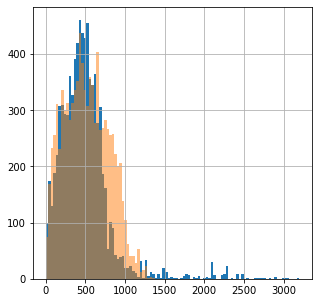

In [18]:
data['parks_nearest'].hist(bins=100,range = (0,3200),figsize=(5, 5))
data['ponds_nearest'].hist(bins=100,range = (0,3200),figsize=(5, 5),alpha=0.5)

<AxesSubplot:>

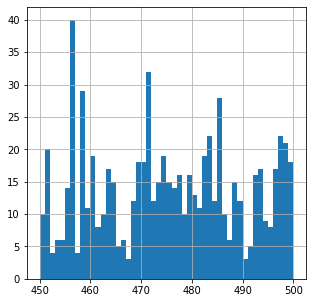

In [19]:
data['parks_nearest'].hist(bins=50,range = (450,500),figsize=(5, 5))#проверим пики
#неравномерность графиков может быть обусловлена высотными многоквартирными домами с большим кол-вом объявлений которым будет соответсвоавть одинаковое расстояние до парка. 
#проверить это можно вычислив зависимость этажности домов от отклонения от нормального,но это слишком детально для нашего масштаба исследования 

Нам необходимо заполнить пропуски. Предположим, что алгоритм проставлял пропуски для значений больше 3000 м. Теоретически пропуски можно заменить на значения, к примеру, 3500 м. Но для начала посмотрим, работал ли алгорим одинаково для Санкт-Петербурга и других населенных пунктов.  

In [20]:
#создадим новые стобцы в датафрейме с исходными даными, так как не будем их использовать после предобработки данных
data_raw['parks_nearest_NaN'] =np.where(data_raw['parks_nearest'].isnull(), 'Пропуск','Есть данные')
data_raw['ponds_nearest_NaN'] =np.where(data_raw['ponds_nearest'].isnull(), 'Пропуск','Есть данные')
data_raw['locality_name_bool'] =np.where(data_raw['locality_name']=='Санкт-Петербург', 'Санкт-Петербург','Другие')



In [21]:
#data_raw.head()

In [22]:
data_raw['locality_name_bool'].value_counts()

Санкт-Петербург    15721
Другие              7978
Name: locality_name_bool, dtype: int64

In [23]:
data_raw['parks_nearest_NaN'].value_counts()

Пропуск        15620
Есть данные     8079
Name: parks_nearest_NaN, dtype: int64

In [24]:
data_raw.groupby(['parks_nearest_NaN']) ['locality_name_bool'].value_counts()

parks_nearest_NaN  locality_name_bool
Есть данные        Санкт-Петербург       7284
                   Другие                 795
Пропуск            Санкт-Петербург       8437
                   Другие                7183
Name: locality_name_bool, dtype: int64

Можем заметить, объявлений в Санкт-Петербурге  в два раза больше, чем в остальных населенных пунктах. При этом  в северной столице есть данные о расстоянии до парка в 46 % процентах объявлений, а в объявлениях не в Санкт-Петербурге - только для 9,9 % процентах объявлений. Можно предположить, что алгорим работает только для городов. Создав группировку по типам населенных пунктов, можно будет заполнить пропуски для городов большим расстоянием, а в сельской местности - оставить пустые значения. Проведем аналогичные расчеты для парков:   

In [25]:
data_raw['ponds_nearest_NaN'].value_counts()

Пропуск        14589
Есть данные     9110
Name: ponds_nearest_NaN, dtype: int64

In [26]:
data_raw.groupby(['ponds_nearest_NaN']) ['locality_name_bool'].value_counts()

ponds_nearest_NaN  locality_name_bool
Есть данные        Санкт-Петербург       7983
                   Другие                1127
Пропуск            Санкт-Петербург       7738
                   Другие                6851
Name: locality_name_bool, dtype: int64

Для 50,8% объявлений есть данные о водоемах в Санкт-Петербурге и 14,1% в других населенных пунктах.Можно предположить, что в городах указывают данные в случае, если есть водоем(ы) в пешей доступности, а сельской местности только если расположен непосредственно у воды. 

Мы выяснили, что появление пропусков сильно зависит от типа населенного пункта. Для корректных выводов, нужно категоризовать населенные пункты (Санкт-Петербург(с пригородами или нет), города, сельская местность). 

##### Балконы

Предположим, что пропуски в данном столбце связаны с тем, что у пользователей нет балкона. Заполним пропуски нулями.

In [27]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [28]:
data['balcony']=data['balcony'].fillna(0)#заполним пропуски нулями 

In [29]:
data['balcony']=data['balcony'].astype(int)#сделаем данные целочисленными

<AxesSubplot:ylabel='Frequency'>

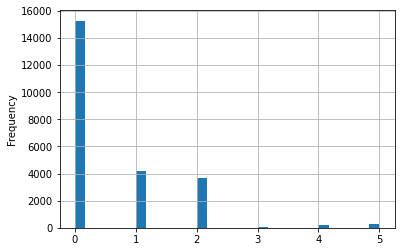

In [30]:
data['balcony'].plot(
    y='balcony', 
    kind='hist', 
    bins=30, 
    range=(0,5),
    grid=True)

##### Высота потолков

В столбце с данными о высоте потолков большое количество пропусков (38,8%), также есть аномальные значения (1 м и 100 м). Предположим, что пропуски связаны с тем, что пользователи сами не указали эти данные.Заменим данные на медианные значения.
upd дальнейшее иследование показало, что это было неверное решение и мы оставили пропуски.

In [31]:
data['ceiling_height'].isna().sum()#кол-во пропусков

9195

In [32]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

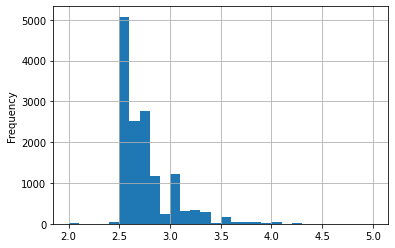

In [33]:
data['ceiling_height'].plot(
    y='ceiling_height', 
    kind='hist', 
    bins=30, 
    range=(2,5),
    grid=True)

In [34]:
ceiling_height_median = data['ceiling_height'].median()
display(ceiling_height_median)

2.65

In [35]:
#data['ceiling_height']=data['ceiling_height'].fillna(ceiling_height_median)

In [36]:
#data['ceiling_height'].isna().sum()# проверим сколько осталось пропусков 

In [37]:
display(data['ceiling_height'][data['ceiling_height'] > 10].count())#кол-во объявлений с высотой потолка больше 10 метров 


25

In [38]:
display(data['ceiling_height'][data['ceiling_height']<= 1.5].count())#кол-во объявлений с высотой потолка меньше 1.5 метров 

2

In [39]:
#тут я ошибся и удалил 9195 пропусков + 27 аномальных значений, после того как вернулся и решил не заполнять медианой 
#data = data.loc[(data['ceiling_height'] < 10) & (data['ceiling_height'] >1.5)] #оставим в выборке только не анамальные значения 
# перенесем анамальные значения тоже в пропуски
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = None
data.loc[data['ceiling_height'] < 1.5,'ceiling_height'] = None


In [40]:
#пропуски на месте и к ним добавились аномальные значения 
display(data['ceiling_height'].isna().sum())

9222

##### Расстояние до центра города

В столбце "Расстояние до центра города" процент пропусков 23,3%. График распределения показывает несколько пиков:самый большой соответствует объявлениям из Санкт-Петербурга (внутри КАДа); второй по размеру, в районе 30 км от центра, соответствует городам-спутникам - Пушкин, Колпино, Всеволожск, Отрадное и т.д; третий по размеру, в районе 50 км от центра соответствует Гатчине и другим населенным пунктам рядом с Санкт-Петербургским южным полукольцом.Оставим пропуски из-за невозможности установить причину происхождения и отсутствия аномалий в распределении данных.

In [42]:
data['cityCenters_nearest'].isna().sum()#кол-во пропусков

5519

In [43]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

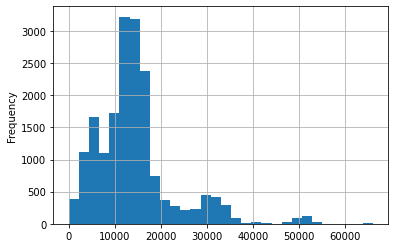

In [44]:
data['cityCenters_nearest'].plot(
    y='cityCenters_nearest', 
    kind='hist', 
    bins=30, 
    range=(0,66000),
    grid=True)

##### Расстояние до ближайшего аэропорта

В столбце "Расстояние до ближайшего аэропорта" 23,4% пропусков, так как пассажирский аэропорт всего один. т.к.распределение данных похоже на истинное, оставим пропуски на месте. Есть минимальное значение аномально низкое, врядли объявление может быть прям в аэропорту 

In [45]:
data['airports_nearest'].isna().sum()#кол-во пропусков

5542

In [46]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [47]:
#display(data[data['airports_nearest']<= 1000])
data = data.loc[(data['airports_nearest'] !=0)] #удалим одно объявление с аномально низким значением 
display(data['airports_nearest'][data['airports_nearest']<= 6000].count())

0

<AxesSubplot:ylabel='Frequency'>

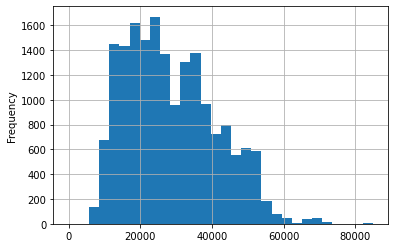

In [48]:
data['airports_nearest'].plot(
    y='airports_nearest', 
    kind='hist', 
    bins=30, 
    range=(0,85000),
    grid=True)

##### Число парков и водоёмов в радиусе 3 км

В столбцах число парков и водоемов в радиусе трех километров одинаковое количество пропусков, проверим есть ли зависимость от того как располагаются объявления в Санкт-Петербурге и долей пропусков.

In [49]:
data['ponds_around3000'].isna().sum()#кол-во пропусков

5518

In [50]:
data['parks_around3000'].isna().sum()#кол-во пропусков

5518

In [51]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [52]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [53]:
data_raw['ponds_around3000_NaN'] =np.where(data_raw['ponds_around3000'].isnull(), 'Пропуск','Есть данные')
data_raw['locality_name_bool'] =np.where(data_raw['locality_name']=='Санкт-Петербург', 'Санкт-Петербург','Другие')


In [54]:
data_raw['ponds_around3000_NaN'].value_counts()


Есть данные    18181
Пропуск         5518
Name: ponds_around3000_NaN, dtype: int64

In [55]:
data_raw['locality_name_bool'].value_counts()

Санкт-Петербург    15721
Другие              7978
Name: locality_name_bool, dtype: int64

In [56]:
data_raw.groupby(['ponds_around3000_NaN']) ['locality_name_bool'].value_counts()

ponds_around3000_NaN  locality_name_bool
Есть данные           Санкт-Петербург       15660
                      Другие                 2521
Пропуск               Другие                 5457
                      Санкт-Петербург          61
Name: locality_name_bool, dtype: int64

Заполним пропуски нулями, но будем помнить, что дальше в иследование можно использовать эти данные с максимальной точностью для Санкт-Петербурга, так как количесво пропусков в нем минимально. 

In [57]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0) #заполним нулями пропуски в данных
data['parks_around3000']=data['parks_around3000'].fillna(0)

##### Период размещения объявлений

В столбце где указано сколько дней было размещено объявление 13,4% пропусков, предположим, что это активные объявления ~~и их лучше удалить из выборки~~, так как в процессе продажи может измениться цена, время продажи и это исказит наши выводы.
Потверждение нашего предположение о том, что мы удалим активные объявления можем посмотреть в главе 2.1.11  Дата публикации.

In [58]:
data['days_exposition'].isna().sum()#кол-во пропусков

3181

In [59]:
len(data)

23698

In [60]:
data['days_exposition'].describe()

count    20517.000000
mean       180.894526
std        219.731722
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

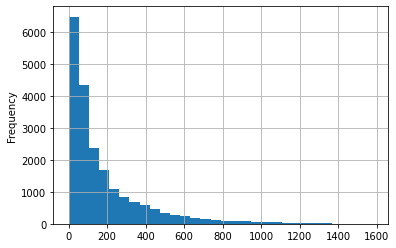

In [61]:
data['days_exposition'].plot(
    y='days_exposition', 
    kind='hist', 
    bins=30, 
    range=(0,1580),
    grid=True)

In [62]:
#Не будем удалять пропуски
#data = data.dropna(subset=['days_exposition'])#удалим пропуски
#display(data['days_exposition'].isna().sum())#проверим

In [63]:
#Создадим стобец в котором укажем есть ли пропуск в стобце  где указано сколько дней было размещено объявление
data['active_ad'] =np.where(data['days_exposition'].isnull(), 0,1)
data['active_ad']=data['active_ad'].astype(bool)

In [64]:
#data['days_exposition']=data['days_exposition'].astype(int)
display(data.head())#проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,True
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True


##### Общая площадь.

В столбце с общей площадью есть аномально большие значения, удалим их.

In [65]:
display(data['total_area'][data['total_area'] > 400].count())#кол-во объявлений с общей площадью больше 400

23

In [66]:
data = data.loc[(data['total_area'] < 400)] #оставим в выборке только не анамальные значения 
display(data['total_area'][data['total_area'] > 400].count())# проверим

0

##### Площадь кухни и площадь жилых помещений.

В стобцах с площадью кухни и площадью жилых помещений 9,6%  и 8,0% пропусков соответсвенно. Заполним пропуски медианым значением доли кухни и жилой площади в общей площади квартиры. 

In [67]:
data['kitchen_area'].isna().sum()#кол-во пропусков

2273

In [68]:
data['living_area'].isna().sum()#кол-во пропусков

1896

In [69]:
data['median_kitchen'] = data['kitchen_area']/data['total_area']# доля кухни в строчках без пропусков
display(data['median_kitchen'].describe())# лучше взять медиану доли так как анамальные значения смещены в большую сторону

count    21399.000000
mean         0.187454
std          0.072929
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232493
max          0.787879
Name: median_kitchen, dtype: float64

In [70]:
data['kitchen_area'] =data['kitchen_area'].fillna((data['total_area']*data['median_kitchen'].median()))#заполним пропуски произведением общей площади на медиану доли кухни в строках без пропусков
display(data.head())
data['kitchen_area'].isna().sum()#кол-во пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,True,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,27.413793,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,0.410000


0

In [71]:
data['median_living_area'] = data['living_area']/data['total_area']# доля жилых помещений в строчках без пропусков
display(data['median_living_area'].describe())# среднее и медиана практически не отличается,возьмем медиану

count    21776.000000
mean         0.564775
std          0.105351
min          0.021583
25%          0.495173
50%          0.567860
75%          0.637880
max          1.000000
Name: median_living_area, dtype: float64

In [72]:
data['living_area'] =data['living_area'].fillna((data['total_area']*data['median_living_area'].median()))#заполним пропуски произведением общей площади на медиану доли кухни в строках без пропусков
display(data.head())
data['kitchen_area'].isna().sum()#кол-во пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen,median_living_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False,0.231481,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True,0.272277,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,True,0.148214,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,90.289724,9,False,False,False,27.413793,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,0.410000,0.320000


0

In [73]:
#посчитаем у скольких объвлений сумма кухонной и жилой площадей больше суммарной площади
data['total_area'].loc[(data['total_area']< (data['living_area']+data['kitchen_area']))].count()

116

In [74]:
#посчитаем у скольких объвлений сумма кухонной и жилой площадей больше суммарной площади на 10 процентов и удалим их
data.loc[((data['living_area']+data['kitchen_area'])/data['total_area'])>1.1] = None
data = data.dropna(subset=['total_area'])

In [75]:
#осталось 66 объявлений где сумма кухонной и жилой площадей больше суммарной площади, но меньше чем на 10 процентов
data['total_area'].loc[(data['total_area']< (data['living_area']+data['kitchen_area']))].count()

66

##### Этажность дома и название населённого пункта.

Всего в 86 объявлениях не указана этажность дома удалим строки с пропусками.И приведем тип даных к целочисленым.

In [76]:
data['floors_total'].isna().sum() #кол-во пропусков

86

In [77]:
data = data.dropna(subset=['floors_total'])#удалим пропуски
display(data['floors_total'].isna().sum())#проверим

0

In [78]:
data = data.dropna(subset=['floors_total'])#удалим пропуски
display(data['floors_total'].isna().sum())#проверим

0

In [79]:
data['floors_total']=data['floors_total'].astype(int)#сделаем данные столбца целочисленными

Так же посупим и с 49 пропусками в столбце с названием населенных пунктов.

In [80]:
data['locality_name'].isna().sum() #кол-во пропусков

48

In [81]:
data = data.dropna(subset=['locality_name'])#удалим пропуски
display(data['locality_name'].isna().sum())#проверим

0

Остались пропуски только в столбцах связанных с расстоянием, что бы заполнить их займемся групировкой населеных пунктов:
В списке уникальных значений можно заметить:
- городской посёлок;
- поселок;
- поселок городского типа;
- посёлок;
- посёлок городского типа ;
- посёлок при железнодорожной станции;

Нужно привезти к единому виду.

In [82]:
len_unique_raw=display(set(data['locality_name'].unique())) #Множество не содержит дубликаты элементов, что поможет нам в поиске неявных дубликатов 


{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [83]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #заменим буквы ё на е



In [84]:
 #создадим кортеж элементы которого будут содержать значения которое нужно заменить и новое значение
replacement_locality_name=[
('поселок городского типа','поселок'),
('поселок при железнодорожной станции','поселок'),
('городской поселок','поселок'),
('коттеджный поселок','поселок'),    
('садоводческое некоммерческое товарищество','садовое товарищество'),    
]
#создадим цикл который передаст пары из картежа на замену.
for old, new in replacement_locality_name:
    data['locality_name'] = data['locality_name'].str.replace(old, new)

In [85]:
display(set(data['locality_name'].unique()))

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

В столбце с назанием населеных пунктов остались:
- города;
- поселки;
- деревни;
- села;
- садовые товарищества;
В дальнейшем на основе этих данных разделим объявления на 2 или 3 категории:
Города и сельская местность или Санкт-Петербург с пригородами, города и сельская местность.


##### Дата публикации

В столбце с датой публикации изменим формат даты, оставив только год, месяч и число

In [86]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
display(data.head())#проверим
data_raw['first_day_exposition'] = pd.to_datetime(data_raw['first_day_exposition'], format = '%Y-%m-%d')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen,median_living_area
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.000000,8.0,0.0,0.0,0.0,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.0,0.231481,0.472222
1,7.0,3350000.0,40.4,2018-12-04,1.0,NaN,11,18.600000,1.0,0.0,0.0,0.0,11.000000,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1.0,0.272277,0.460396
2,10.0,5196000.0,56.0,2015-08-20,2.0,NaN,5,34.300000,4.0,0.0,0.0,0.0,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1.0,0.148214,0.612500
3,0.0,64900000.0,159.0,2015-07-24,3.0,NaN,14,90.289724,9.0,0.0,0.0,0.0,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,1.0,NaN,NaN
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.000000,13.0,0.0,0.0,0.0,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1.0,0.410000,0.320000


~~В главе 2.1.8  Период размещения объявлений мы удаляли пропуски в столбце, предположив что это активные объявления,на графике мы видим, что пропала большая часть объявлений опубликованых с марта 2019 года.~~

In [87]:
#посторим график по количеству объявлений за каждый представленый месяц для сырых данных и с преобработаными даными.
#data["first_day_exposition"].groupby([data["first_day_exposition"].dt.year, data["first_day_exposition"].dt.month]).count().plot(kind="bar",figsize=(10, 10))
#data_raw["first_day_exposition"].groupby([data_raw["first_day_exposition"].dt.year, data_raw["first_day_exposition"].dt.month]).count().plot(kind="bar",figsize=(10, 10),alpha=0.5)

#### Аномальные значения

In [88]:
#data.describe()
pd.options.display.float_format = '{:,.4f}'.format #избавление от Экспоненциальной записи
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen,median_living_area
count,"23,488.0000","23,488.0000","23,488.0000","23,488.0000","14,407.0000","23,488.0000","23,488.0000","23,488.0000","23,488.0000","23,488.0000","23,488.0000","23,488.0000","23,488.0000","17,983.0000","18,004.0000","23,488.0000","7,999.0000","23,488.0000","9,005.0000","20,328.0000","23,488.0000","21,282.0000","21,632.0000"
mean,9.8789,"6,381,769.6487",59.8630,2.0667,2.7266,10.6726,34.2910,5.8701,0.0020,0.0062,0.0027,10.4288,0.5932,"28,799.8379","14,204.9648",0.4682,490.9362,0.5891,518.5963,180.7785,0.8655,0.1871,0.5643
std,5.6785,"8,181,799.7899",32.4055,1.0650,0.2895,6.5900,20.7437,4.8649,0.0452,0.0783,0.0521,5.7967,0.9604,"12,638.7663","8,614.7375",0.7478,341.8902,0.8829,278.0253,219.7704,0.3412,0.0721,0.1043
min,0.0000,"12,190.0000",12.0000,0.0000,1.7500,1.0000,2.0000,1.0000,0.0000,0.0000,0.0000,1.3000,0.0000,"6,450.0000",181.0000,0.0000,1.0000,0.0000,13.0000,1.0000,0.0000,0.0254,0.0216
25%,6.0000,"3,400,000.0000",40.0000,1.0000,2.5100,5.0000,19.0000,2.0000,0.0000,0.0000,0.0000,7.0000,0.0000,"18,557.0000","9,263.7500",0.0000,288.0000,0.0000,294.0000,45.0000,1.0000,0.1333,0.4951
50%,9.0000,"4,630,000.0000",52.0000,2.0000,2.6500,9.0000,30.0000,4.0000,0.0000,0.0000,0.0000,9.0000,0.0000,"26,757.0000","13,105.0000",0.0000,455.0000,0.0000,503.0000,95.0000,1.0000,0.1723,0.5678
75%,14.0000,"6,750,000.0000",69.6000,3.0000,2.8000,16.0000,42.0000,8.0000,0.0000,0.0000,0.0000,12.0000,1.0000,"37,286.0000","16,293.0000",1.0000,612.0000,1.0000,731.0000,231.0000,1.0000,0.2319,0.6374
max,50.0000,"330,000,000.0000",399.0000,19.0000,8.3000,60.0000,264.5000,33.0000,1.0000,1.0000,1.0000,107.0000,5.0000,"84,869.0000","65,968.0000",3.0000,"3,190.0000",3.0000,"1,344.0000","1,580.0000",1.0000,0.7246,0.9673


Аномальные значения остались в столбце с последней ценой, оставим только объявления дороже 500 тыс. рублей и дешевле 100 млн. 

In [89]:
display(data['last_price'][data['last_price']< 500000].count())
display(data['last_price'][data['last_price']> 100000000].count())
data = data.loc[(data['last_price'] >500000) & (data['last_price'] <100000000)]
data['last_price'].describe()

14

26

count       23,444.0000
mean     6,221,051.5543
std      6,268,146.8750
min        520,000.0000
25%      3,400,000.0000
50%      4,625,770.0000
75%      6,750,000.0000
max     99,000,000.0000
Name: last_price, dtype: float64

В столбце с жилой площададь так же встречаются аномально маленьки значения, избавимся от них

In [90]:
display(data['living_area'][data['living_area']< 10].count())

data = data.loc[data['living_area'] >10]
data['living_area'].describe()

31

count   23,382.0000
mean        34.2430
std         20.3313
min         10.0800
25%         19.0000
50%         30.0000
75%         42.0000
max        264.5000
Name: living_area, dtype: float64

##### Результаты предобработки данных

В ходе предобработки данных, мы удалили 268 строчек или 1.1% процентов от исходных данных. Выявили предположительные причины возникнавения пропусков в каждом столбце и при возможности заполнили эти пропуски, стараясь максимально сохранить информацию.

In [91]:
display(data.info(),data_raw.info())
display(data.isna().sum(),data_raw.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23382 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23382 non-null  float64       
 1   last_price            23382 non-null  float64       
 2   total_area            23382 non-null  float64       
 3   first_day_exposition  23382 non-null  datetime64[ns]
 4   rooms                 23382 non-null  float64       
 5   ceiling_height        14345 non-null  float64       
 6   floors_total          23382 non-null  int64         
 7   living_area           23382 non-null  float64       
 8   floor                 23382 non-null  float64       
 9   is_apartment          23382 non-null  float64       
 10  studio                23382 non-null  float64       
 11  open_plan             23382 non-null  float64       
 12  kitchen_area          23382 non-null  float64       
 13  balcony         

None

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9037
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5476
cityCenters_nearest      5455
parks_around3000            0
parks_nearest           15436
ponds_around3000            0
ponds_nearest           14433
days_exposition          3149
active_ad                   0
median_kitchen           2176
median_living_area       1842
dtype: int64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
parks_nearest_NaN           0
ponds_nearest_NaN           0
locality_name_bool          0
ponds_around3000_NaN        0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена за квадратный метр

Добавим новый столбец с ценой за квадратный метр жилья 

In [92]:
data['price_area'] = data['last_price'] / data['total_area']
data['price_area']=data['price_area'].astype(int)#сделаем значения целочислеными 
display(data['price_area'].describe())

  

count    23,382.0000
mean     98,501.3817
std      42,956.5033
min      10,185.0000
25%      76,530.0000
50%      94,880.5000
75%     113,953.0000
max     848,484.0000
Name: price_area, dtype: float64

#### День недели, месяц и год публикации объявления

Создадим три дополнительных столбца содержащие информацию о дне недели,месяце и годе когда было размещено объявление, 

In [93]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday#вернет день недели по дате
data['month'] = data['first_day_exposition'].dt.month#вернет месяц по дате
data['year'] = data['first_day_exposition'].dt.year#вернет год по дате
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen,median_living_area,price_area,day_of_week,month,year
0,20.0000,"13,000,000.0000",108.0000,2019-03-07,3.0000,2.7000,16,51.0000,8.0000,0.0000,0.0000,0.0000,25.0000,0.0000,Санкт-Петербург,"18,863.0000","16,028.0000",1.0000,482.0000,2.0000,755.0000,NaN,0.0000,0.2315,0.4722,120370,3,3,2019
1,7.0000,"3,350,000.0000",40.4000,2018-12-04,1.0000,NaN,11,18.6000,1.0000,0.0000,0.0000,0.0000,11.0000,2.0000,поселок Шушары,"12,817.0000","18,603.0000",0.0000,NaN,0.0000,NaN,81.0000,1.0000,0.2723,0.4604,82920,1,12,2018
2,10.0000,"5,196,000.0000",56.0000,2015-08-20,2.0000,NaN,5,34.3000,4.0000,0.0000,0.0000,0.0000,8.3000,0.0000,Санкт-Петербург,"21,741.0000","13,933.0000",1.0000,90.0000,2.0000,574.0000,558.0000,1.0000,0.1482,0.6125,92785,3,8,2015
3,0.0000,"64,900,000.0000",159.0000,2015-07-24,3.0000,NaN,14,90.2897,9.0000,0.0000,0.0000,0.0000,27.4138,0.0000,Санкт-Петербург,"28,098.0000","6,800.0000",2.0000,84.0000,3.0000,234.0000,424.0000,1.0000,NaN,NaN,408176,4,7,2015
4,2.0000,"10,000,000.0000",100.0000,2018-06-19,2.0000,3.0300,14,32.0000,13.0000,0.0000,0.0000,0.0000,41.0000,0.0000,Санкт-Петербург,"31,856.0000","8,098.0000",2.0000,112.0000,1.0000,48.0000,121.0000,1.0000,0.4100,0.3200,100000,1,6,2018


#### Тип этажа квартиры

Добавим строку с типами этажей:
- Первый;
- Другой;
- Последний.

In [94]:

def floor(row):#создадим функцию которая вернет тип этажа
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
data['floor_type'] = data.apply(floor, axis=1)
#data.head(15)
data['floor_type'].value_counts(normalize=True)

other   0.7363
last    0.1405
first   0.1233
Name: floor_type, dtype: float64

#### Тип населеного пункта

Создадим классификацию по типам населеных пунктов:
- Санкт-Петербург и объявления ближе 18000 от центра города, внутри КАДа, которые являются спальными районами Санкт-Петербурга
- Остальные города;
- Сельская местность.

In [95]:
cites=['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно']
data['cityCenters_nearest_cash'] = data['cityCenters_nearest']
data['cityCenters_nearest_cash']=data['cityCenters_nearest_cash'].fillna(18001)
def local_type(row):#создадим функцию которая вернет для 
    if (row['locality_name'] in cites):
        return 'urban'
    if ((row['locality_name']=='Санкт-Петербург') | (row['cityCenters_nearest_cash']<18000)):
        return 'Petersburg'
    else:
        return 'unurban'



In [96]:
data['local_type'] = data.apply(local_type, axis=1)

In [97]:
#data.head(15)#проверим

In [98]:
display(data['local_type'].value_counts())
display(data['local_type'].value_counts(normalize=True))

Petersburg    15586
urban          4170
unurban        3626
Name: local_type, dtype: int64

Petersburg   0.6666
urban        0.1783
unurban      0.1551
Name: local_type, dtype: float64

In [99]:
aggfunc_=['count','mean','min','max']#список который применится к сводной таблице.
data.pivot_table(index='local_type', values='ponds_nearest', aggfunc=aggfunc_)

,count,mean,min,max
,ponds_nearest,ponds_nearest,ponds_nearest,ponds_nearest
local_type,,,,
Petersburg,7851,521.4844,13.0000,"1,337.0000"
unurban,249,592.4578,59.0000,"1,344.0000"
urban,849,476.6007,22.0000,"1,140.0000"


Гипотиза о том что не в городах, указывают растояние до водоема, только если объект объявления непосрествено у воды не потвердилось.

#### Расстояние в километрах до центра города

In [100]:
data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen,median_living_area,price_area,day_of_week,month,year,floor_type,cityCenters_nearest_cash,local_type,cityCenters_nearest_km
0,20.0000,"13,000,000.0000",108.0000,2019-03-07,3.0000,2.7000,16,51.0000,8.0000,0.0000,0.0000,0.0000,25.0000,0.0000,Санкт-Петербург,"18,863.0000","16,028.0000",1.0000,482.0000,2.0000,755.0000,NaN,0.0000,0.2315,0.4722,120370,3,3,2019,other,"16,028.0000",Petersburg,16.0280
1,7.0000,"3,350,000.0000",40.4000,2018-12-04,1.0000,NaN,11,18.6000,1.0000,0.0000,0.0000,0.0000,11.0000,2.0000,поселок Шушары,"12,817.0000","18,603.0000",0.0000,NaN,0.0000,NaN,81.0000,1.0000,0.2723,0.4604,82920,1,12,2018,first,"18,603.0000",unurban,18.6030
2,10.0000,"5,196,000.0000",56.0000,2015-08-20,2.0000,NaN,5,34.3000,4.0000,0.0000,0.0000,0.0000,8.3000,0.0000,Санкт-Петербург,"21,741.0000","13,933.0000",1.0000,90.0000,2.0000,574.0000,558.0000,1.0000,0.1482,0.6125,92785,3,8,2015,other,"13,933.0000",Petersburg,13.9330
3,0.0000,"64,900,000.0000",159.0000,2015-07-24,3.0000,NaN,14,90.2897,9.0000,0.0000,0.0000,0.0000,27.4138,0.0000,Санкт-Петербург,"28,098.0000","6,800.0000",2.0000,84.0000,3.0000,234.0000,424.0000,1.0000,NaN,NaN,408176,4,7,2015,other,"6,800.0000",Petersburg,6.8000
4,2.0000,"10,000,000.0000",100.0000,2018-06-19,2.0000,3.0300,14,32.0000,13.0000,0.0000,0.0000,0.0000,41.0000,0.0000,Санкт-Петербург,"31,856.0000","8,098.0000",2.0000,112.0000,1.0000,48.0000,121.0000,1.0000,0.4100,0.3200,100000,1,6,2018,other,"8,098.0000",Petersburg,8.0980


### Проведите исследовательский анализ данных

#### Общие характеристики

Рассмотри подробней следующее характеристики:
- Общая площадь;
- Жилая площадь;
- Площадь кухни;
- Цена объекта;
- Количество комнат;
- Высота потолков;
- Этаж квартиры;
- Тип этажа квартиры;
- Общее количество этажей в доме;
- Города и Сельская местность
- Расстояние до центра города в метрах;
- Расстояние до ближайшего аэропорта;
- Расстояние до ближайшего парка;
- День и месяц публикации объявления

Общая площадь


count   23,382.0000
mean        59.7301
std         31.7364
min         14.0000
25%         40.0000
50%         52.0000
75%         69.5825
max        399.0000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

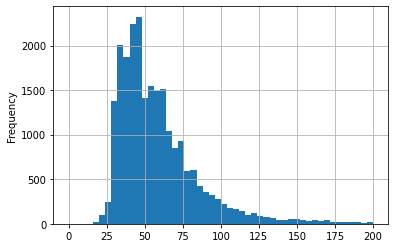

In [101]:
print('Общая площадь')
display(data['total_area'].describe())
display(data['total_area'].plot(
    y='total_area', 
    kind='hist', 
    bins=50, 
    range=(0,200),
    grid=True))

Для большей части объявлений общая площадь составляет от 30 до 50 кв.м, доля квартир с большей площадью быстро снижается. При приближение графика (20-50) можем увидеть пики на значениях площади характерных для типовых квартир. Медианое значение - 50.7, Среднее -58.21 видим небольшое смещение среднего из за квартир с большой площадью. 

Жилая площадь


count   23,382.0000
mean        34.2430
std         20.3313
min         10.0800
25%         19.0000
50%         30.0000
75%         42.0000
max        264.5000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

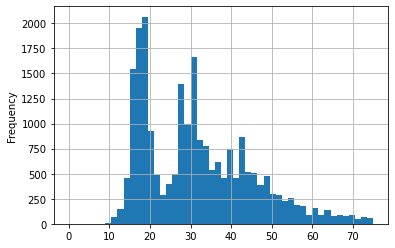

In [102]:
print('Жилая площадь')
display(data['living_area'].describe())
display(data['living_area'].plot(
    y='living_area', 
    kind='hist', 
    bins=50, 
    range=(0,75),
    grid=True))

Для большей части объявлений жилая площадь составляет от 18 до 45 кв.м, доля квартир с большей жилой площадью быстро снижается. При приближение графика (10-70) можем увидеть три  пики на значениях площади характерных для одна-двух-трехкомнатных типовых квартир. Медианое значение - 30, Среднее - 33,31 видим небольшое смещение среднего из за квартир с большой площадью.

Площадь кухни


count   23,382.0000
mean        10.3935
std          5.6841
min          1.3000
25%          7.0000
50%          9.0000
75%         11.9270
max        107.0000
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

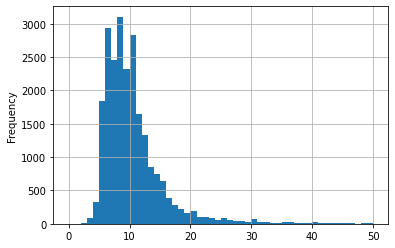

In [103]:
print('Площадь кухни')
display(data['kitchen_area'].describe())
display(data['kitchen_area'].plot(
    y='kitchen_area', 
    kind='hist', 
    bins=50, 
    range=(0,50),
    grid=True))

Кухня в доме обычно одна,график харкетерен для нормального распределения величены. При приближение графика (5-15) можем увидеть  пики на значениях площади кухни характерной для типовых квартир, но значения округлены до целого числа, что может быть связано с тем что данные вводились самим пользователем приблизительно. Медианое значение - 9, Среднее - 10,27 видим небольшое смещение среднего из за квартир с большой площадью.

Цена объекта


count       23,382.0000
mean     6,224,793.9885
std      6,262,913.9366
min        520,000.0000
25%      3,420,000.0000
50%      4,646,500.0000
75%      6,750,000.0000
max     99,000,000.0000
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

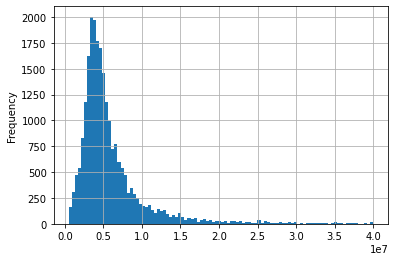

In [104]:
print('Цена объекта')
display(data['last_price'].describe())
display(data['last_price'].plot(
    y='last_price', 
    kind='hist', 
    bins=100, 
    range=(data['last_price'].min(),40000000),
    grid=True))

График распределение  цены в объявление имеет вид характерный для нормального распредления.  Медианое значение 4,5 млн рублей, Среднее - 5,9 млн рублей, видим большое смещение из за квартир с высокой ценой.

Количество комнат


count   23,382.0000
mean         2.0670
std          1.0618
min          0.0000
25%          1.0000
50%          2.0000
75%          3.0000
max         19.0000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

1.0000     7917
2.0000     7867
3.0000     5769
4.0000     1160
5.0000      311
0.0000      187
6.0000       96
7.0000       49
8.0000       10
9.0000        7
10.0000       3
14.0000       2
11.0000       2
19.0000       1
16.0000       1
Name: rooms, dtype: int64

1.0000    0.3386
2.0000    0.3365
3.0000    0.2467
4.0000    0.0496
5.0000    0.0133
0.0000    0.0080
6.0000    0.0041
7.0000    0.0021
8.0000    0.0004
9.0000    0.0003
10.0000   0.0001
14.0000   0.0001
11.0000   0.0001
19.0000   0.0000
16.0000   0.0000
Name: rooms, dtype: float64

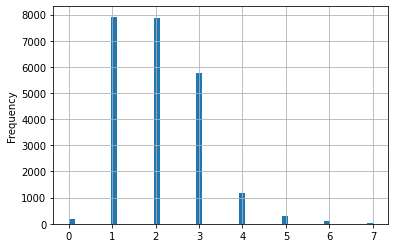

In [105]:
print('Количество комнат')
display(data['rooms'].describe())
display(data['rooms'].plot(
    y='rooms', 
    kind='hist', 
    bins=50, 
    range=(0,7),
    grid=True))
display(data['rooms'].value_counts())
display(data['rooms'].value_counts(normalize=True))

Больше всего объявлений было о продажи однокомнатных квартир 35,4 % , на вторм месте с небольшим отстованием двухкомнатные квартиры 33,8 %, трехкомнатных 4,6 %  , остальные квартиры являются скорее экзотикой. 

Высота потолков


count   14,345.0000
mean         2.7251
std          0.2857
min          1.7500
25%          2.5100
50%          2.6500
75%          2.8000
max          8.3000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

2.5000   0.2443
2.6000   0.1142
2.7000   0.1085
3.0000   0.0768
2.8000   0.0684
Name: ceiling_height, dtype: float64

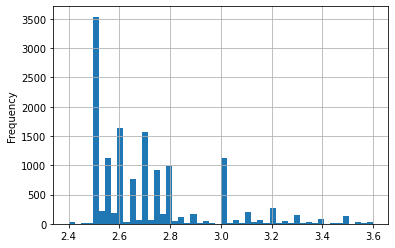

In [106]:
print('Высота потолков')
display(data['ceiling_height'].describe())
display(data['ceiling_height'].plot(
    y='ceiling_height', 
    kind='hist', 
    bins=50, 
    range=(2.4,3.6),
    grid=True))
display(data['ceiling_height'].value_counts(normalize=True).head())

При работе с пропусками мы заменили их на медианое значение 2.65, но их было слишком много, что может исказить наше исследование, вернемся назад и не будем заполнять пропуски. Без заполнения пропусков, можно отметить, что 24% квартир имеет высоту потолка 2.5 метра, что является стандартной высотой потолков в "хрущевках", 2.6 и 2.7 метра в "панельках" разных серий и т.д. Благодаря этим данным можно примерно показать долю различных типов жилового фонда в объявлениях.

Высота потолков


count   14,345.0000
mean         2.7251
std          0.2857
min          1.7500
25%          2.5100
50%          2.6500
75%          2.8000
max          8.3000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

2.5000   0.2443
2.6000   0.1142
2.7000   0.1085
3.0000   0.0768
2.8000   0.0684
Name: ceiling_height, dtype: float64

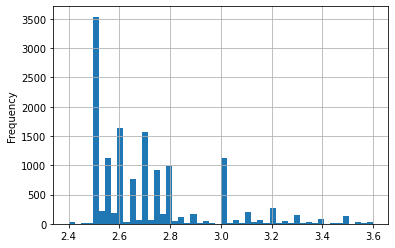

In [107]:
print('Высота потолков')
display(data['ceiling_height'].describe())
display(data['ceiling_height'].plot(
    y='ceiling_height', 
    kind='hist', 
    bins=50, 
    range=(2.4,3.6),
    grid=True))
display(data['ceiling_height'].value_counts(normalize=True).head())

Этаж квартиры


count   23,382.0000
mean         5.8724
std          4.8638
min          1.0000
25%          2.0000
50%          4.0000
75%          8.0000
max         33.0000
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

2.0000   0.1425
3.0000   0.1298
1.0000   0.1233
4.0000   0.1188
5.0000   0.1112
Name: floor, dtype: float64

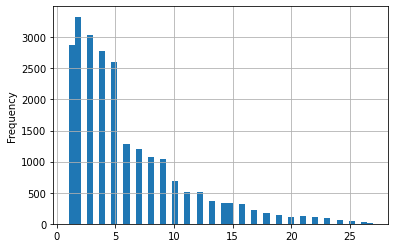

In [108]:
print('Этаж квартиры')
display(data['floor'].describe())
display(data['floor'].plot(
    y='floor', 
    kind='hist', 
    bins=50, 
    range=(1,27),
    grid=True))
display(data['floor'].value_counts(normalize=True).head())

Большинство квартир в объявлениях распологаются на 2 этаже 14.6%. Так же можно отметить высокий процент объявлений с 1 по 5 этаж так как эти этажи встречаются в пятиэтажках и всех других типах домов, следующая "ступенька" на 10 этаже когда из выборки выходя девятиэтажки, дальше доля квартир по этажам снижается плавно. 

In [109]:
print('Тип этажа квартиры')
#display(data['floor_type'].describe())
#display(data['floor_type'].plot(
#    y='floor_type', 
#    kind='hist', 
#    bins=50, 
#    range=(1,27),
#    grid=True))
display(data['floor_type'].value_counts(normalize=True).head())

Тип этажа квартиры


other   0.7363
last    0.1405
first   0.1233
Name: floor_type, dtype: float64

14 % объявлений на последнем этаже,12.3% на первом (меньший процент может быть связан с использыванием первого этажа под комерчиские помещения). Такой процент для крайних значений можно объяснить достаточно низкой застройкой.

Общее количество этажей в доме


count   23,382.0000
mean        10.6793
std          6.5880
min          1.0000
25%          5.0000
50%          9.0000
75%         16.0000
max         60.0000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

5    0.2453
9    0.1601
16   0.0587
12   0.0580
4    0.0506
Name: floors_total, dtype: float64

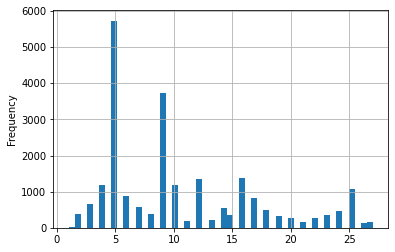

In [110]:
print('Общее количество этажей в доме')
display(data['floors_total'].describe())
display(data['floors_total'].plot(
    y='floors_total', 
    kind='hist', 
    bins=50, 
    range=(1,27),
    grid=True))
display(data['floors_total'].value_counts(normalize=True).head())

Больше всего объявлений в пятиэтажках 25%, следом идут девятиэтажки с 18% и двенадцатиэтажки и шеснадцатииэтажки с 6 %, типовые проекты берут топ в этажности домов.

In [111]:
print('Города и Сельская местность')
display(data['local_type'].value_counts(normalize=True).head())

Города и Сельская местность


Petersburg   0.6666
urban        0.1783
unurban      0.1551
Name: local_type, dtype: float64

Практически 70 % объявлений располагаются в северной столице или ее пригорадах, 17% в оставшихся городах и 13 % процентов в сельской местности, что может свидетельвовоать о высокой урбанизированости района и большей развитости сервиса в городах.

Расстояние до центра города в метрах


count   17,927.0000
mean    14,221.3042
std      8,612.2532
min        181.0000
25%      9,289.0000
50%     13,114.0000
75%     16,293.0000
max     65,968.0000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

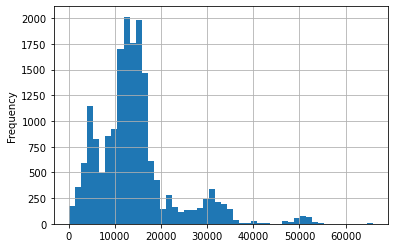

In [112]:

print('Расстояние до центра города в метрах')
display(data['cityCenters_nearest'].describe())
display(data['cityCenters_nearest'].plot(
    y='cityCenters_nearest', 
    kind='hist', 
    bins=50, 
    range=(1,data['cityCenters_nearest'].max()),
    grid=True))


График распределения показывает несколько пиков:самый большой соответствует объявлениям из Санкт-Петербурга (внутри КАДа); второй по размеру, в районе 30 км от центра, соответствует городам-спутникам - Пушкину, Колпино, Всеволожску, Отрадному и т.д; третий по размеру, в районе 50 км от центра соответствует Гатчине и другим населенным пунктам рядом с Санкт-Петербургским южным полукольцом.

Расстояние до ближайшего аэропорта


count   17,906.0000
mean    28,794.4815
std     12,647.0476
min      6,450.0000
25%     18,539.0000
50%     26,756.5000
75%     37,294.0000
max     84,869.0000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

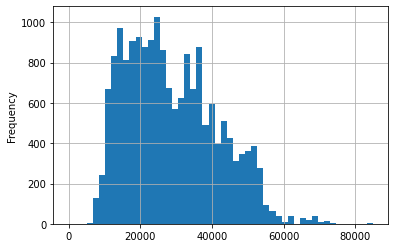

In [113]:
print('Расстояние до ближайшего аэропорта')
display(data['airports_nearest'].describe())
display(data['airports_nearest'].plot(
    y='airports_nearest', 
    kind='hist', 
    bins=50, 
    range=(1,data['airports_nearest'].max()),
    grid=True))

Рядом с Санкт-Петербургом распологается только один пасажирский аэропорт, если методика подсчета расстояния одинакова с расстоянием до центра города, то можем заметит, что пики на графике не такие выраженные, это может быть связано с кольцевой структурой раселения и когда мы вынесли точку до которой считается расстояние на юг за КАД, то график стал отображать, что на юге  Санкт-Петербурга объявлений больше чем на севере. 

Расстояние до ближайшего парка


count   7,946.0000
mean      491.0891
std       342.0091
min         1.0000
25%       288.0000
50%       455.0000
75%       612.0000
max     3,190.0000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

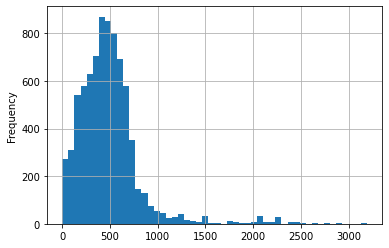

In [114]:
print('Расстояние до ближайшего парка')
display(data['parks_nearest'].describe())
display(data['parks_nearest'].plot(
    y='parks_nearest', 
    kind='hist', 
    bins=50, 
    range=(1,data['parks_nearest'].max()),
    grid=True))

У 75 % процентов объявлений, в которых указано расстояние до парка, он находится ближе 600 метров, такой хорошо выраженнный пик на графике, может быть обусловлен нормами при строительстве типовых микрорайонов.

День публикации объявления


count   23,382.0000
mean         2.5667
std          1.7870
min          0.0000
25%          1.0000
50%          3.0000
75%          4.0000
max          6.0000
Name: day_of_week, dtype: float64

<AxesSubplot:ylabel='Frequency'>

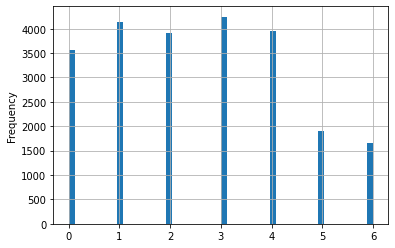

In [115]:
print('День публикации объявления')
display(data['day_of_week'].describe())
display(data['day_of_week'].plot(
    y='day_of_week', 
    kind='hist', 
    bins=50, 
    range=(0,6),
    grid=True))


В выходные публикуют в 2 раза меньше объявлений чем в будние дни

Месяц публикации объявления


count   23,382.0000
mean         6.4034
std          3.4933
min          1.0000
25%          3.0000
50%          6.0000
75%         10.0000
max         12.0000
Name: month, dtype: float64

<AxesSubplot:ylabel='Frequency'>

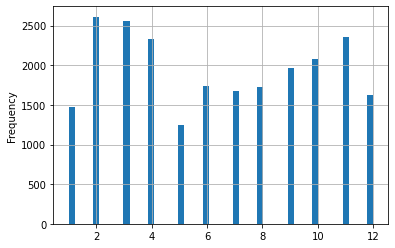

In [116]:
print('Месяц публикации объявления')
display(data['month'].describe())
display(data['month'].plot(
    y='month', 
    kind='hist', 
    bins=50, 
    range=(1,12),
    grid=True))

С  начала лета по конец осени доля размещеных объявлений плавно увеличивается, затем начинаются новогодние праздники объявлений публикуюется меньше, это формирует отложеное предложение в феврале.Весной количество новых объявлений вновь снижается, достигая минимальных значений в мае.

Как долго было размещано объявление


count   20,233.0000
mean       180.5929
std        219.6757
min          1.0000
25%         45.0000
50%         95.0000
75%        231.0000
max      1,580.0000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

45.0000   0.0430
60.0000   0.0263
7.0000    0.0114
30.0000   0.0102
90.0000   0.0099
4.0000    0.0086
3.0000    0.0077
5.0000    0.0075
14.0000   0.0071
9.0000    0.0069
Name: days_exposition, dtype: float64

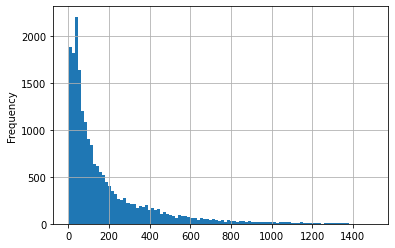

In [117]:
print('Как долго было размещано объявление')
display(data['days_exposition'].describe())
display(data['days_exposition'].plot(
    y='days_exposition', 
    kind='hist', 
    bins=100, 
    range=(1,1500),
    grid=True))

display(data['days_exposition'].value_counts(normalize=True).head(10))

<AxesSubplot:ylabel='Frequency'>

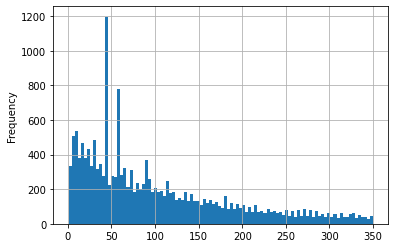

In [118]:
display(data['days_exposition'].plot(
    y='days_exposition', 
    kind='hist', 
    bins=100, 
    range=(1,350),
    grid=True))

    В среднем объявление было размещено на сайте 180  дней, медианое значение 103 дня, такая большая разница возникает из за объявлений с долгим сроком размещения до 1580 дней. К быстрым продажам можно отнести продажи до 45 дней, которые характерны до 25 % объявлений, а к долгим больше 250 дней, куда попажают так же меньше четверти объявлений.
    Так же увеличив маштаб, можно заметить пики на значениях 45 дней(3.3% объявлений), 60 дней (2,3%), 7 дней (1.3%), 30 дней(1.3%) и 90 дней (0.9%). В Яндекс Справка указано, что сроки, в течение которых объявление о продаже считается актуальным для объявлений не в Москве и МО для квартир и комнат 45 дней, для домов и участков - 90 дней . По истечении этих сроков объявления снимаются с публикации.Для агентов есть платное размещение объявлений на 30 дней.
    Для бессплатных объявлений срок размещения зависит от стоимоти квартиры до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней,от 10 млн — 90 дней.
    С чем связан пик на 7 днях установить не получилось.
 


#### Факторы влияющие на стоимость объекта 

Выясним, какие факторы больше всего влияют на общую (полную) стоимость объекта. Иследуем, как указанные ниже параметры вляют на цену в объявление: 
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Общая площадь
коэффициент корреляции Пирсона


0.7625129707147413

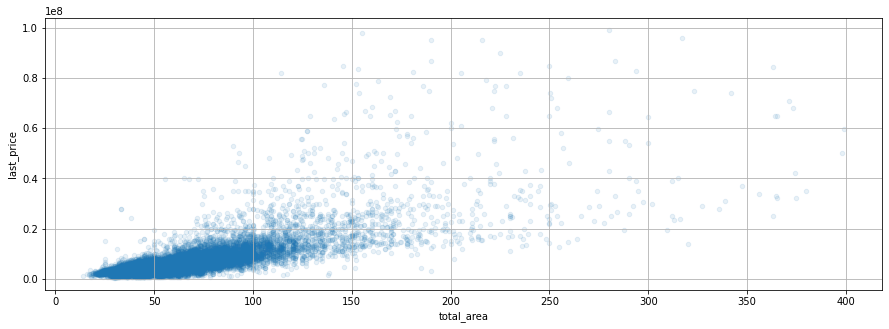

In [119]:
print('Общая площадь')
data.plot(
    x='total_area', 
    y='last_price', 
    kind='scatter',
    alpha=0.1,
    grid=True,
    style = 'x',#почему то не работают хрестики вмето кружочков 
    figsize=(15,5))
print('коэффициент корреляции Пирсона')
data['total_area'].corr(data['last_price'])

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

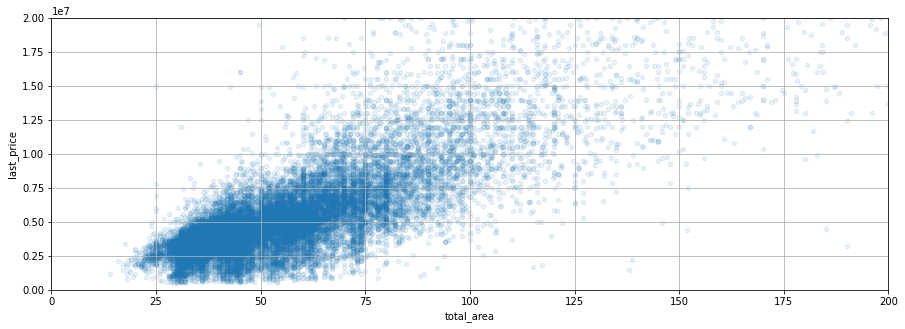

In [120]:
#увеличим маштаб
data.plot(
    x='total_area', 
    y='last_price', 
    kind='scatter',
    alpha=0.1,
    grid=True,
    style = 'x',
    xlim = (0,200),
    ylim = (0,20000000),
    figsize=(15,5))

Существует линейная зависимость площади квартиры и цены. Коэффициент корреляции Пирсона равен 0.77

Жилая площадь
коэффициент корреляции Пирсона


0.680998017963624

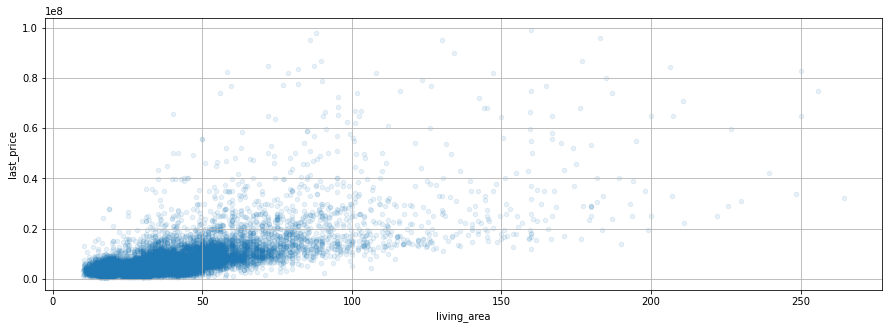

In [121]:
print('Жилая площадь')
data.plot(
    x='living_area', 
    y='last_price', 
    kind='scatter',
    alpha=0.1,
    grid=True,
    style = 'x',
    figsize=(15,5))
print('коэффициент корреляции Пирсона')
data['living_area'].corr(data['last_price'])

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

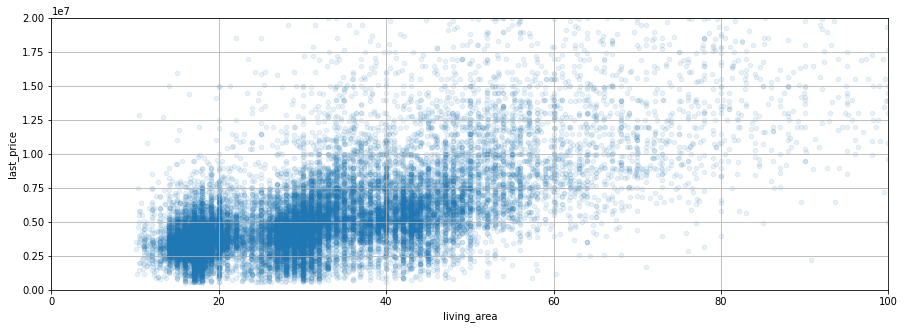

In [122]:
#увеличим маштаб
data.plot(
    x='living_area', 
    y='last_price', 
    kind='scatter',
    alpha=0.1,
    grid=True,
    style = 'x',
    xlim = (0,100),
    ylim = (0,20000000),
    figsize=(15,5))

Существует линейная зависимость жилой площади квартиры и цены. Коэффициент корреляции Пирсона равен 0.69

Площадь кухни
коэффициент корреляции Пирсона


0.6128842736629904

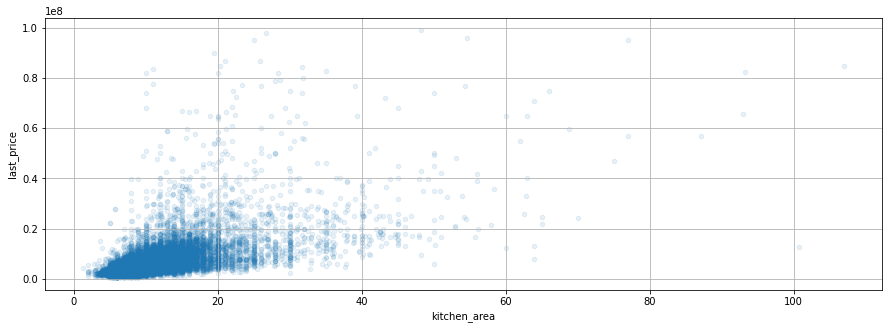

In [123]:
print('Площадь кухни')
data.plot(
    x='kitchen_area', 
    y='last_price', 
    kind='scatter',
    alpha=0.1,
    grid=True,
    style = 'x',
    figsize=(15,5))
print('коэффициент корреляции Пирсона')
data['kitchen_area'].corr(data['last_price'])

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

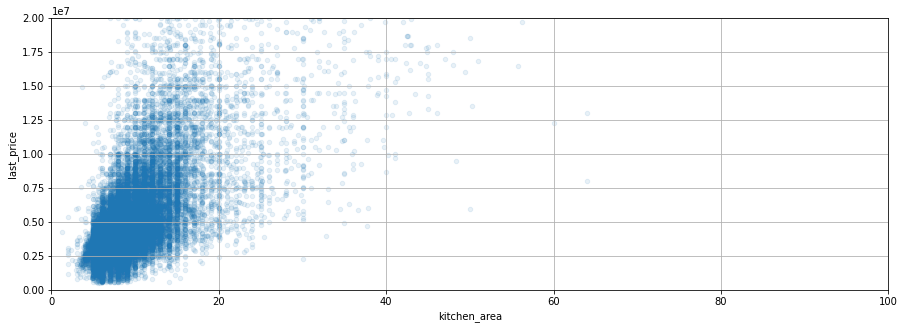

In [124]:
#увеличим маштаб
data.plot(
    x='kitchen_area', 
    y='last_price', 
    kind='scatter',
    alpha=0.1,
    grid=True,
    style = 'x',
    xlim = (0,100),
    ylim = (0,20000000),
    figsize=(15,5))

Существует линейная зависимость  площади кухни и цены. Коэффициент корреляции Пирсона равен 0.62

In [125]:
print('Количество комнат')
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
data.pivot_table(index='rooms', values='last_price', aggfunc=aggfunc_).head(6)#покажем только самые встречаемые квартиры


Количество комнат


,count,mean,median,min,max
,last_price,last_price,last_price,last_price,last_price
rooms,,,,,
0.0000,187,"3,337,816.3102","2,700,000.0000","945,750.0000","71,000,000.0000"
1.0000,7917,"3,835,180.6274","3,600,000.0000","520,000.0000","43,511,000.0000"
2.0000,7867,"5,555,287.8176","4,750,000.0000","550,000.0000","77,612,080.0000"
3.0000,5769,"8,036,091.5722","6,200,000.0000","550,000.0000","99,000,000.0000"
4.0000,1160,"12,444,908.9983","9,000,000.0000","999,000.0000","96,000,000.0000"
5.0000,311,"18,656,930.8103","13,500,000.0000","1,650,000.0000","95,000,000.0000"


коэффициент корреляции Пирсона


0.4656897970031504

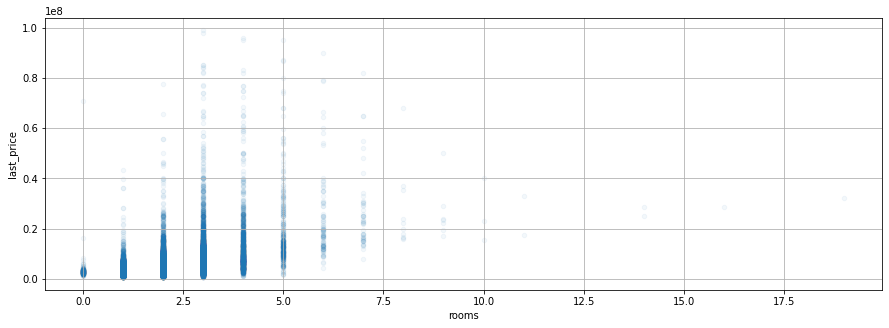

In [126]:
data.plot(
    x='rooms', 
    y='last_price', 
    kind='scatter',
    alpha=0.05,#увеличим прозрачность
    grid=True,
    style = 'x',
    figsize=(15,5))
print('коэффициент корреляции Пирсона')
data['rooms'].corr(data['last_price'])

Существует линейная зависимость  кол-во комнат и цены. Коэффициент корреляции Пирсона равен 0.47. 

In [127]:
print('Тип этажа')
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
data.pivot_table(index='floor_type', values='last_price', aggfunc=aggfunc_)

Тип этажа


,count,mean,median,min,max
,last_price,last_price,last_price,last_price,last_price
floor_type,,,,,
first,2882,"4,723,511.1065","3,900,000.0000","520,000.0000","77,000,000.0000"
last,3285,"6,263,510.1151","4,300,000.0000","560,000.0000","99,000,000.0000"
other,17215,"6,468,739.0823","4,850,000.0000","530,000.0000","98,000,000.0000"


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

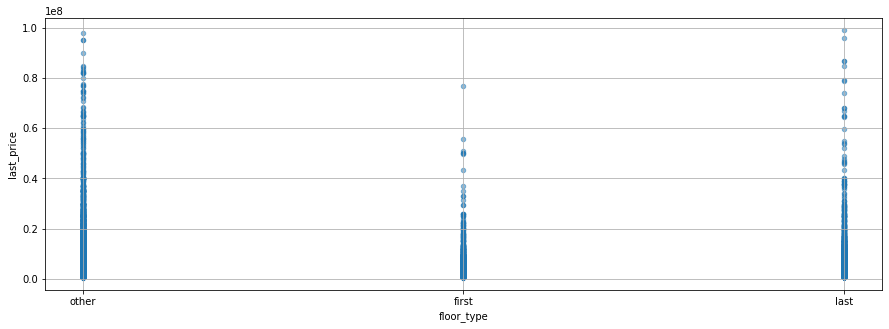

In [129]:
data.plot(
    x='floor_type', 
    y='last_price', 
    kind='scatter',
    alpha=0.5,
    grid=True,
    style = 'x',
    figsize=(15,5))
#print('коэффициент корреляции Пирсона')
#data['floor_type'].corr(data['last_price'])

Существует зависимость от типа этажа и ценой, если смотреть на медианые значения то квартиры на первом этаже стоят на миллион рублей дешевле чем квартиры не на первом и последнем этаже, а на последнем на 500 тыс.рублей, но на диаграмме рассевания можно заметить квартиры на последних этажах по цене выше остальных, скорее всего скидка на последнем этаже характерна для старого фонда из за возможных проблем с крышей. 

In [130]:
print('Даты размещения,день недели')
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
data.pivot_table(index='day_of_week', values='last_price', aggfunc=aggfunc_)

Даты размещения,день недели


,count,mean,median,min,max
,last_price,last_price,last_price,last_price,last_price
day_of_week,,,,,
0,3567,"6,255,099.0289","4,650,000.0000","600,000.0000","82,000,000.0000"
1,4130,"6,151,986.1751","4,704,595.0000","550,000.0000","95,000,000.0000"
2,3917,"6,207,079.5818","4,700,000.0000","530,000.0000","82,400,000.0000"
3,4246,"6,498,728.1799","4,650,000.0000","550,000.0000","86,738,800.0000"
4,3956,"6,140,629.3117","4,550,000.0000","520,000.0000","99,000,000.0000"
5,1907,"6,071,429.3765","4,550,000.0000","550,000.0000","98,000,000.0000"
6,1659,"6,058,599.1242","4,550,000.0000","600,000.0000","95,000,000.0000"


In [131]:
aggfunc_plot=['median']
forplot=data.pivot_table(index='day_of_week', values='last_price', aggfunc=aggfunc_plot)

<AxesSubplot:xlabel='day_of_week'>

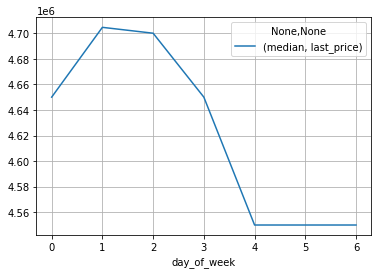

In [132]:
forplot.plot(grid=True)

In [133]:
#коэффициент корреляции Пирсона указывает что линейной взаимосявзи нет 
data['floor'].corr(data['day_of_week'])

0.009827153830327949

На графике можно заметить, что во вторник и среду цены  чуть выше чем в остальные дни. Разница для медианы самого "дорогого" и "дешевого" дня составляет 150 тыс. рублей. 

In [134]:
print('Даты размещения,месяц')
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
data.pivot_table(index='month', values='last_price', aggfunc=aggfunc_)

Даты размещения,месяц


,count,mean,median,min,max
,last_price,last_price,last_price,last_price,last_price
month,,,,,
1,1474,"6,352,561.6879","4,600,000.0000","585,000.0000","99,000,000.0000"
2,2612,"6,244,953.3442","4,650,000.0000","530,000.0000","95,000,000.0000"
3,2558,"6,031,911.4574","4,650,000.0000","550,000.0000","73,884,056.0000"
4,2336,"6,107,979.7637","4,800,000.0000","550,000.0000","77,000,000.0000"
5,1252,"6,227,883.7436","4,500,000.0000","600,000.0000","82,400,000.0000"
6,1734,"6,148,383.7261","4,400,000.0000","560,000.0000","90,000,000.0000"
7,1669,"6,365,477.5440","4,650,000.0000","600,000.0000","96,000,000.0000"
8,1726,"6,133,733.4635","4,580,000.0000","550,000.0000","85,000,000.0000"


<AxesSubplot:xlabel='month'>

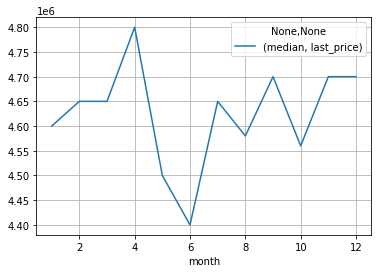

In [135]:
aggfunc_plot=['median']
forplot2=data.pivot_table(index='month', values='last_price', aggfunc=aggfunc_plot)
forplot2.plot(grid=True)

In [136]:
#коэффициент корреляции Пирсона указывает что линейной взаимосявзи нет 
data['floor'].corr(data['month'])

0.020041410037323102

На графике можно заметить, что в цены для объявлений размещеных в мае,июне,е  чуть ниже чем в остальные месяцы. Разница для медианы самого "дорогого" и "дешевого" месяца составляет 300 тыс. рублей. 

In [137]:
print('Даты размещения,год')
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
data.pivot_table(index='year', values='last_price', aggfunc=aggfunc_)

Даты размещения,год


,count,mean,median,min,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,134,"12,175,169.3582","7,868,500.0000","1,200,000.0000","79,339,000.0000"
2015,1153,"7,798,930.9245","5,300,000.0000","650,000.0000","86,738,800.0000"
2016,2729,"6,390,558.3379","4,500,000.0000","580,000.0000","90,000,000.0000"
2017,8103,"6,150,696.9625","4,500,000.0000","520,000.0000","98,000,000.0000"
2018,8418,"5,842,616.0915","4,580,500.0000","550,000.0000","99,000,000.0000"
2019,2845,"6,489,426.9030","5,050,000.0000","530,000.0000","95,000,000.0000"


<AxesSubplot:xlabel='year'>

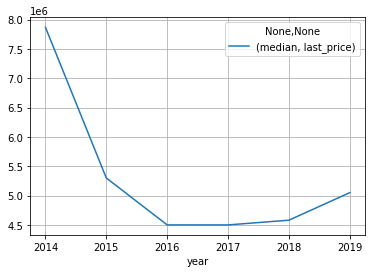

In [138]:
aggfunc_plot=['median']
forplot3=data.pivot_table(index='year', values='last_price', aggfunc=aggfunc_plot)
forplot3.plot(grid=True)

In [139]:
#коэффициент корреляции Пирсона указывает что линейной взаимосявзи нет 
data['floor'].corr(data['year'])

0.007740597230283096

Объявлений 2014 года в выборке всего 134,поэтому лучше их не учитывать в выводах. С 2015 года по 2018 происходило снижение медианой цены с 5.5 млн до 4.8 млн, а затем начинается рост в 2019 на 470 тыс.рублей.

#### В каких в десяти населеных пунктах больше объявлений и сколько стоит квадратный метр.

In [140]:
#создадим датафрейм отсортировав частоту упоминания различных населеных пунктов 
top_10=data['locality_name'].value_counts().sort_values(ascending=False).head(10)
#display(top_10)
#gjrf;tv 
top_10_normalize=data['locality_name'].value_counts(normalize=True).sort_values(ascending=False).head(10)
display(top_10_normalize)

Санкт-Петербург     0.6638
поселок Мурино      0.0232
поселок Шушары      0.0187
Всеволожск          0.0169
Пушкин              0.0157
Колпино             0.0144
поселок Парголово   0.0139
Гатчина             0.0130
деревня Кудрово     0.0127
Выборг              0.0101
Name: locality_name, dtype: float64

Практически 70 % от всех объявлений были расположены в Санкт-Петербурге, в остальных из топ 10 обладают гораздо более скромной долей в диапозоне от 2.3 % до 1 %

In [141]:
#возьмем только стоки с индексом что есть во внешней переменой top_10
top_10_area=data.query('locality_name in @top_10.index')
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
top_10_area.pivot_table(index='locality_name', values='price_area', aggfunc=aggfunc_)
# тут я так и не смог отсортировать

,count,mean,median,min,max
,price_area,price_area,price_area,price_area,price_area
locality_name,,,,,
Всеволожск,396,"68,558.1995","65,789.0000",31400,640422
Выборг,235,"58,106.7872","58,158.0000",18750,107473
Гатчина,305,"68,675.3049","67,695.0000",10507,146315
Колпино,337,"75,480.1187","74,725.0000",47957,125000
Пушкин,368,"103,123.6141","99,993.5000",59836,256521
Санкт-Петербург,15521,"113,509.3781","104,627.0000",15345,848484
деревня Кудрово,297,"92,506.4579","91,860.0000",54160,142857
поселок Мурино,543,"85,381.5138","85,714.0000",50000,130000


<AxesSubplot:xlabel='locality_name'>

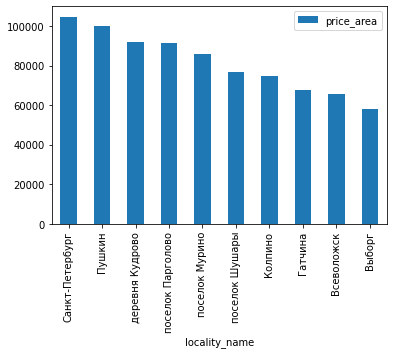

In [142]:
# создадим "Ящик с усами" для каждого населеного в топ 10 
#top_10_area.boxplot('price_area', by='locality_name', figsize=(20, 20))
# который ничего не показал и нагляднее будет столбчатая диограмма
top_10_area.pivot_table(index='locality_name', values='price_area', aggfunc='median').sort_values('price_area',ascending=False).plot.bar()

В топ 10 по объявлениям,квартиры дороже всего в Санкт-Петербурге, дешевле в Выборге, разницв 47 тыс за квадратный метр

#### Цена километра от центра.

In [143]:
# так как это последние задание в нашем иследование, то удалим пропуски, что бы перевести в целочисленые значения
data['cityCenters_nearest_km']=data['cityCenters_nearest_km'].dropna().astype(int)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,active_ad,median_kitchen,median_living_area,price_area,day_of_week,month,year,floor_type,cityCenters_nearest_cash,local_type,cityCenters_nearest_km
0,20.0000,"13,000,000.0000",108.0000,2019-03-07,3.0000,2.7000,16,51.0000,8.0000,0.0000,0.0000,0.0000,25.0000,0.0000,Санкт-Петербург,"18,863.0000","16,028.0000",1.0000,482.0000,2.0000,755.0000,NaN,0.0000,0.2315,0.4722,120370,3,3,2019,other,"16,028.0000",Petersburg,16.0000
1,7.0000,"3,350,000.0000",40.4000,2018-12-04,1.0000,NaN,11,18.6000,1.0000,0.0000,0.0000,0.0000,11.0000,2.0000,поселок Шушары,"12,817.0000","18,603.0000",0.0000,NaN,0.0000,NaN,81.0000,1.0000,0.2723,0.4604,82920,1,12,2018,first,"18,603.0000",unurban,18.0000
2,10.0000,"5,196,000.0000",56.0000,2015-08-20,2.0000,NaN,5,34.3000,4.0000,0.0000,0.0000,0.0000,8.3000,0.0000,Санкт-Петербург,"21,741.0000","13,933.0000",1.0000,90.0000,2.0000,574.0000,558.0000,1.0000,0.1482,0.6125,92785,3,8,2015,other,"13,933.0000",Petersburg,13.0000
3,0.0000,"64,900,000.0000",159.0000,2015-07-24,3.0000,NaN,14,90.2897,9.0000,0.0000,0.0000,0.0000,27.4138,0.0000,Санкт-Петербург,"28,098.0000","6,800.0000",2.0000,84.0000,3.0000,234.0000,424.0000,1.0000,NaN,NaN,408176,4,7,2015,other,"6,800.0000",Petersburg,6.0000
4,2.0000,"10,000,000.0000",100.0000,2018-06-19,2.0000,3.0300,14,32.0000,13.0000,0.0000,0.0000,0.0000,41.0000,0.0000,Санкт-Петербург,"31,856.0000","8,098.0000",2.0000,112.0000,1.0000,48.0000,121.0000,1.0000,0.4100,0.3200,100000,1,6,2018,other,"8,098.0000",Petersburg,8.0000


<AxesSubplot:xlabel='cityCenters_nearest_km'>

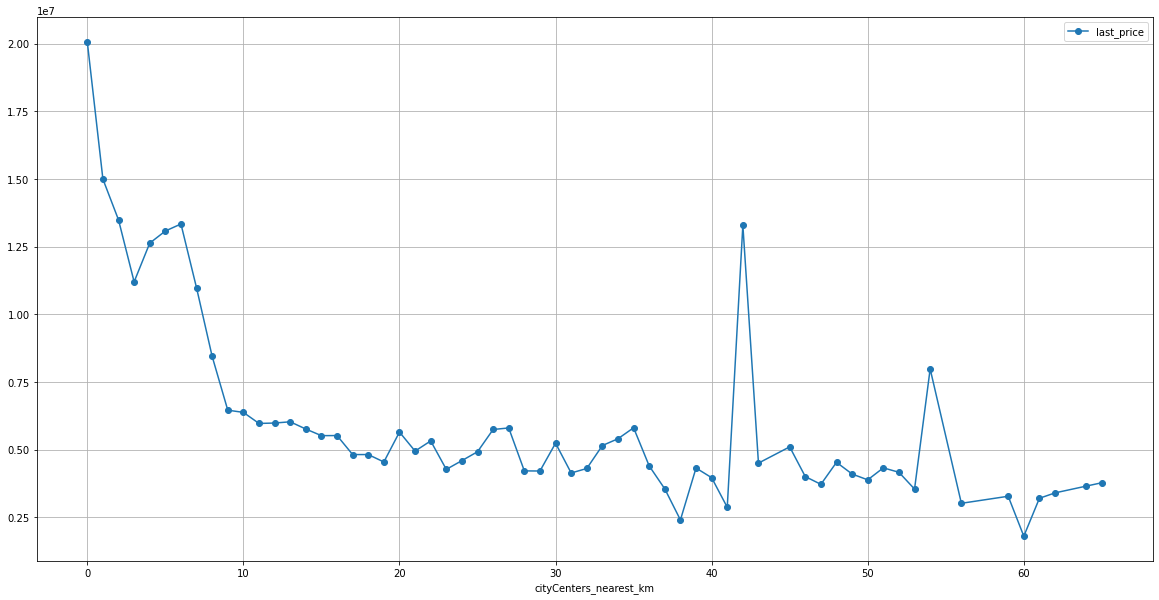

In [144]:
#data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').describe()
data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(grid=True,figsize=(20, 10),style="o-")
#data.pivot_table(index='cityCenters_nearest_km', values='price_area', aggfunc='median').plot(grid=True,figsize=(20, 10))

    Цена в зависимости от удалености от центра быстро снижается, примерно до 20 км, затем действие  фактора расстояния от центра на цену снижается.
    Можно заметить резкие перепады на 3 , 26, 30, 35,42 54 км, посмотрим чем они обусловлены. 

<AxesSubplot:xlabel='cityCenters_nearest_km'>

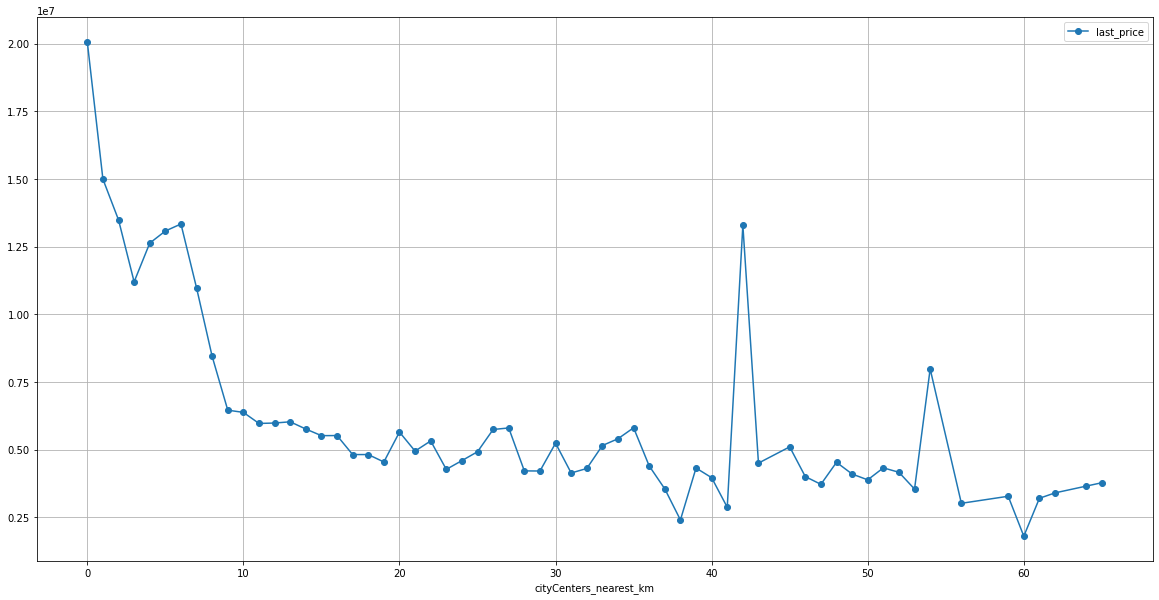

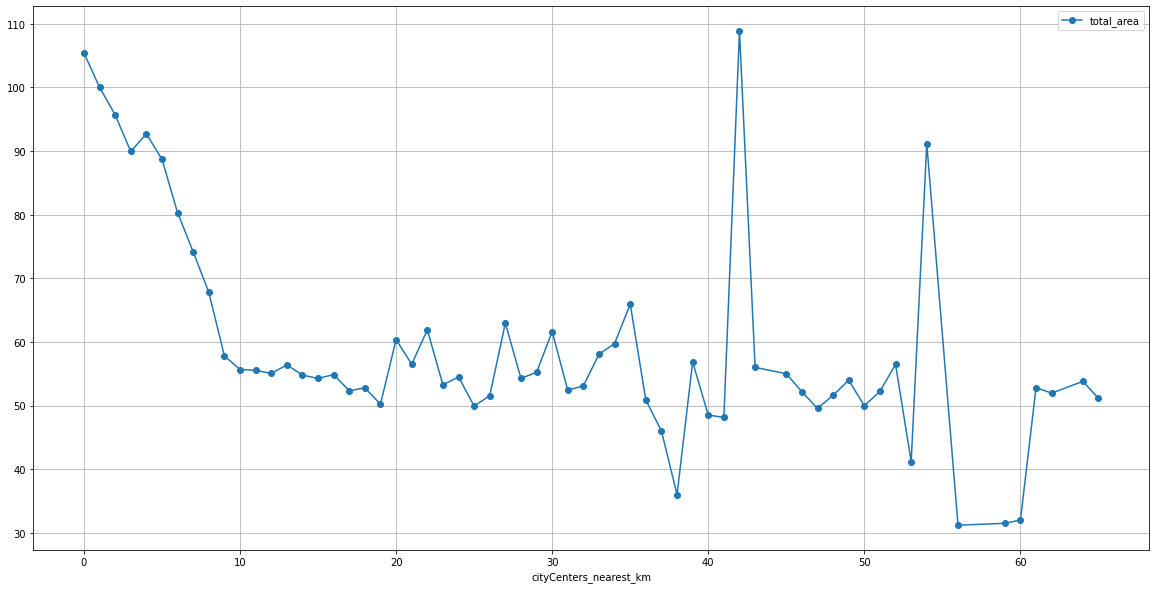

In [145]:
aggfunc_=['count','mean','median','min','max']#список который применится к сводной таблице.
#display(data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=aggfunc_))
#display(data.loc[(data['cityCenters_nearest_km'] ==35)])
#хочу видеть все строки
pd.options.display.max_rows = None
#display(data.loc[(data['cityCenters_nearest_km'] ==30)].sort_values('last_price',ascending=False))
#data.loc[(data['cityCenters_nearest_km'] ==30)].pivot_table(index='rooms', values='last_price', aggfunc=aggfunc_)
#display(data.loc[(data['cityCenters_nearest_km'] ==26)].sort_values('last_price',ascending=False))
#display(data.loc[(data['cityCenters_nearest_km'] ==3)].sort_values('last_price',ascending=False))
data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(grid=True,figsize=(20, 10),style="o-")
data.pivot_table(index='cityCenters_nearest_km', values='total_area', aggfunc='mean').plot(grid=True,figsize=(20, 10),style="o-")

54 км - Дальше 52 км очень мало объявлений, так что единичные значения могут сильно изменить среднее значение.
42 км - Анологично, всего 2 значения
35 км - Уже 45 значений, большая часть этих объявлений из города курорта Сестрорецк, в котором дорогая недвижимость, c просторным жилым фондом.
30 км - 139 значений, из которых 13 объявлений с дорогими 4 комнатными квартирами, так отличается доля квартир с разным количеством комнат на 30 км в сравнении со всеми объявлениями(). 
1-21.58% (33.56 %)  
2-41.73%(33.92 %) 
3-26.62%(24.88 %) 
4-9.35% (4.99 %) 
5-0.72% (1.41%))
26 км - 53 значения большая часть этих объявлений из города Пушкин, в котором дорогая недвижимость, c просторным жилым фондом.
3 км- 262 значения, с чем связана резкое снижение цены относительно соседних км , требуют более подробного исследования.
Для наглядности выведем зависимости цены от общей площади, графики которых практически одинаковые.



### Общий вывод

Мы провели иследование архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
- Предобработка данных показала наличие пропусков в данных, для некоторых стобцов их доля достигала 88%, аномальные значения во многих стобцах и неверный тип данных;
- 70% процентов объвлений были расположены в Санкт-Петербурге и ближайших пригородах, 17% в других городах и 13 процентов в сельской местности;
- Большое влияние на характеристики квартир оказвает  масовая типовая застройка советского периода;
- У 75 % процентов объявлений, в которых указано расстояние до парка, он находится ближе 600 метров;
- В среднем объявление было размещено на сайте 180 дней, на срок размещения влияют внутриние правила сервиса;
- Объявления чаще публикуют в будние дни, чем в выходные;
- Тривиально, но самое большое влияние на цену квартиры оказывает ее площадь;
- Первые этажи чаще всего продаются со скидкой миллион рублей, а последние 500 тыс. рублей ;
- Цены на недвижимость падали с 2015 года по 2018 после чего начали расти в 2019; 
- Среди десяти населеных пунктов с самым большим кол-во объявлений, самый дорогой квадратный метр жилья в Санкт-Петербурге - 105 тыс.рублей, а самый дешевый в Выборге - 58 тыс рублей;
- Средняя цена в объявление резко падает при удалении от центра Санкт-Петербурга, от 18 млн в самомо центре до 4 млн дальше 30 км.
Спасибо за внимание.